In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [40]:
d=pd.read_csv('/content/drive/MyDrive/Datasets/Churn Dataset/Churn_Modelling.csv')
d.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [41]:
d.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [33]:
for col in d:
  if d[col].dtype=='object':
    print(col,':',d[col].unique())

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [34]:
d.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [48]:
d.sample(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
7038,0.560,31,0,0.000000,2,1,1,0.172334,0,0,0,1
3035,0.934,45,9,0.403382,1,0,0,0.441040,1,1,0,1
7381,0.540,25,8,0.565273,1,1,1,0.369267,1,1,0,0
7570,0.694,32,7,0.699347,3,1,0,0.582210,1,0,0,1
4926,0.648,36,6,0.401608,1,1,0,0.910813,0,1,0,0
761,0.686,35,5,0.494827,1,1,0,0.443510,1,0,0,0
8918,0.582,52,4,0.000000,1,1,0,0.454808,1,0,0,0
8847,0.214,40,10,0.535358,2,1,0,0.753801,0,0,0,1
8545,0.326,34,7,0.241194,1,0,0,0.622857,0,1,0,1
7650,0.800,42,8,0.605171,2,1,0,0.343452,0,1,0,1


In [43]:
from sklearn.preprocessing import MinMaxScaler
sca=MinMaxScaler()
d['Balance']=sca.fit_transform(d[['Balance']])
d['EstimatedSalary']=sca.fit_transform(d[['EstimatedSalary']])
d['CreditScore']=sca.fit_transform(d[['CreditScore']])

In [45]:
d=pd.get_dummies(data=d,columns=['Geography','Gender'],drop_first=True)

In [47]:
d.replace({True:1,False:0},inplace=True)

In [49]:
x=d.drop('Exited',axis=1)
y=d['Exited']

In [60]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [61]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(xtrain,ytrain)

LogisticRegression()

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ypred=log.predict(xtest)
print(accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))

0.813
[[1546   61]
 [ 313   80]]


<Axes: >

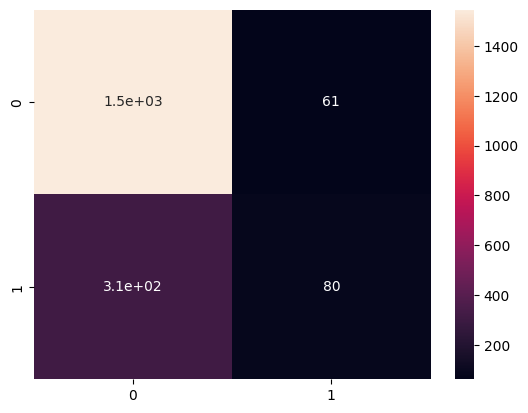

In [63]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)

In [78]:
from sklearn.ensemble import RandomForestClassifier
rff=RandomForestClassifier(n_estimators=100)
rff.fit(xtrain,ytrain)

RandomForestClassifier()

In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ypred=rff.predict(xtest)
print(accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))

0.8665
[[1549   58]
 [ 209  184]]


In [80]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier()
grad.fit(xtrain,ytrain)

GradientBoostingClassifier()

In [81]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ypred=grad.predict(xtest)
print(accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))

0.8675
[[1543   64]
 [ 201  192]]


In [73]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10,shuffle=True)
result=cross_val_score(log,x,y,cv=kfold)
print(result)
print(result.mean())

[0.819 0.819 0.82  0.802 0.79  0.804 0.82  0.787 0.811 0.827]
0.8099000000000001


In [74]:
result1=cross_val_score(rf,x,y,cv=kfold)
print(result)
print(result.mean())

[0.819 0.819 0.82  0.802 0.79  0.804 0.82  0.787 0.811 0.827]
0.8099000000000001


In [75]:
result2=cross_val_score(grad,x,y,cv=kfold)
print(result)
print(result.mean())

[0.819 0.819 0.82  0.802 0.79  0.804 0.82  0.787 0.811 0.827]
0.8099000000000001
